# Descrição do Problema

## Introdução
Os dados referem-se a campanhas de marketing de uma instituição bancária portuguesa. 
As campanhas de marketing foram baseadas em ligações telefônicas. 
Muitas vezes, era necessário mais de um contato para o mesmo cliente, para descobrir se o produto (depósito bancário a prazo) seria ou não aderido.

### Descrição do Produto "Term Deposits"

Os "term deposits", ou depósitos a prazo, são uma das melhores opções de investimento para quem busca um retorno estável e seguro de seus investimentos. Nos Depósitos a Prazo, a quantia em dinheiro é mantida por um prazo fixo e o depositante não pode sacar essa quantia até o final do período de vencimento. É por isso que são chamados de Depósitos a Prazo, porque são mantidos por um determinado prazo. A taxa de juros depende do período em que os fundos estão bloqueados.

---

## Variáveis

No total são 21 variáveis, sendo 1 a coluna que indica se o produto foi contratado ou não. As variáveis podem ser divididas nos seguintes grupos:


### Dados do cliente
1. "age": idadade, numérico discreto.

2. "job": trabalho, categórico. 12 categorias, sendo 1 desconhecida 'unknown', 1 desempregado, 1 estudante e 9 variados.

3. "marital": estado civil, categórico. 4 categorias, sendo 1 desconhecida 'unknown'. Viúvo está contido na categoria divorciado.

4. "education": educação, categórico. 8 categorias, sendo 1 desconhecida 'unknown'.

5. "default": o crédito está inadimplente (em dívida com o crédito)? categórico. 3 categorias ('yes', 'no'), sendo 1 desconhecida 'unknown'.

6. "housing": tem empréstimo habitacional?  categórico. 3 categorias ('yes', 'no'), sendo 1 desconhecida 'unknown'.

7. "loan": tem algum empréstimo pessoal?  categórico. 3 categorias ('yes', 'no'), sendo 1 desconhecida 'unknown'.

### Dados relacionados com o último contato da campanha atual 

8. "contact": meio de contanto, categórico. 2 categorias.

9. "month": último mês de contato, categórico. 12 categorias.

10. "day_of_week": último dia de contato, categórico. 7 categorias.

11. "duration": duração do último contato, em segundos (numérico). 
<p style="color:#cc9900">
Observação importante: o atributo "duration" afeta fortemente a meta de saída (por exemplo, se duração = 0, então y = 'no'). No entanto, a duração não é conhecida antes que uma chamada seja realizada. Além disso, após o final da chamada, y é obviamente conhecido. Assim, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.</p>

### Outros atributos da campanha

12. "campaign": número de contatos realizados durante esta campanha e para este cliente (inclui último contato), numérico discreto.

13. "pdays": número de dias que se passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente), numérico discreto.

14. "previous": número de contatos realizados antes desta campanha e para este cliente, numérico discreto.

15. "poutcome": resultado da campanha de marketing anterior, categorico. ('failure','nonexistent','success')

### Atributos de contexto social e econômico

16. "emp.var.rate": taxa de variação do emprego - indicador trimestral: numérico contínuo.

17. "cons.price.idx": índice de preços do consumidor - indicador mensal: numérico contínuo.

18. "cons.conf.idx": índice de confiança do consumidor - indicador mensal: numérico contínuo.

19. "euribor3m": taxa euribor a 3 meses - indicador diário: numérico contínuo.

20. "nr.employed": número de funcionários - indicador trimestral: numérico contínuo.

<p style="color:#cc9900">
Observação: A Euribor, em português "taxa interbancária oferecida em euro", indica a taxa de juros média dos empréstimos interbancários sem garantia da Zona Euro. É muito utilizado como taxa de referência para os empréstimos bancários.

</p>



### Output

21. "y": o cliente contratou o depósito a prazo? categórico: 'yes' ou 'no'.

---

### Imports

In [1]:
import importlib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Análise Exploratória

1. Análise univariada de todas as features com excessão de 'duration'
2. Criação de hipóteses e novas variáveis

In [2]:
data = pd.read_csv("bank-additional-full.csv", delimiter=';')
data_unk = data.copy()
# resumo dos atributos numéricos
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# drop duration
data = data.drop('duration', axis=1)

# descrição rápida dos dados
data.info()

data['Contratou'] = (data['y'] == 'yes').astype(int)
data['Contratou'].sum()/len(data['Contratou'])
data['p_days'] = (data['pdays'] != 999).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

### 1. Univariadas

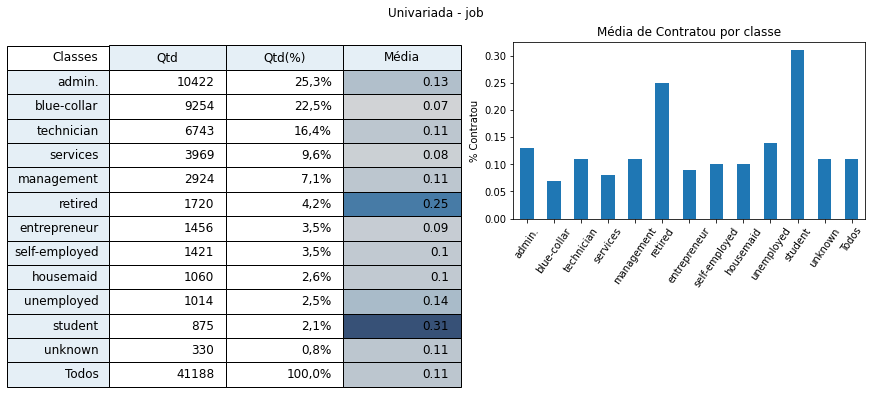

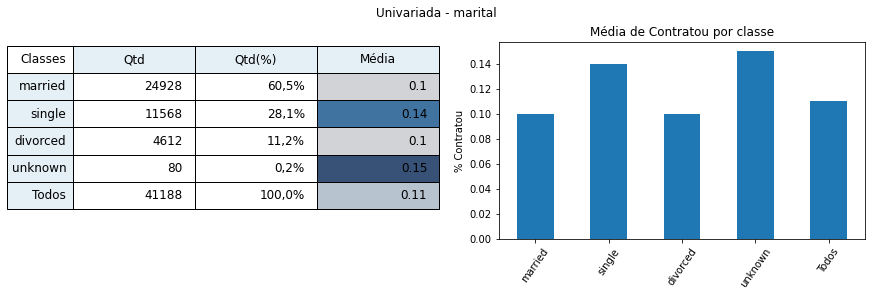

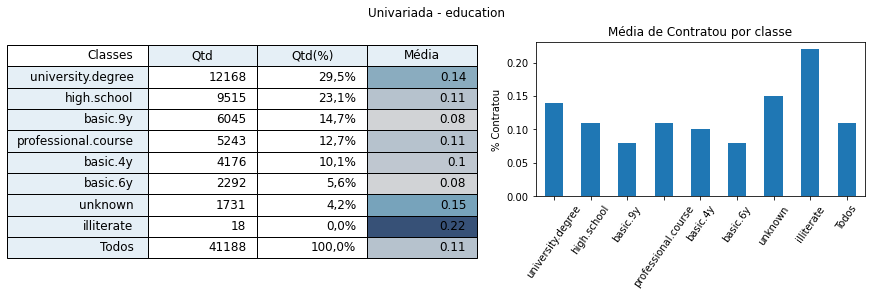

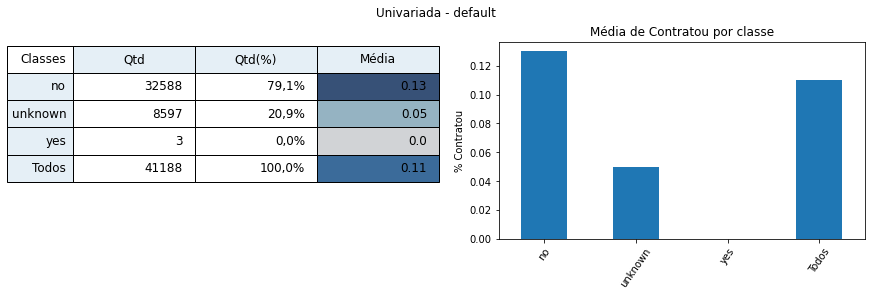

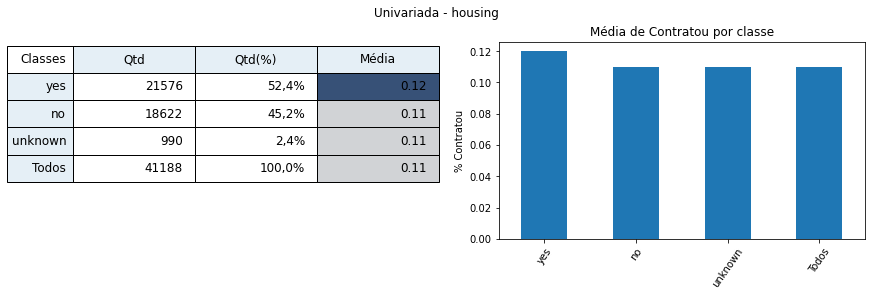

c:\Users\pedro\Desktop\ITA\Semestre_09\PO-233\Projeto PO-233\univariate.py:153: RuntimeWarning: invalid value encountered in true_divide
  norm_data = (data - np.min(data)) / (np.max(data) - np.min(data))


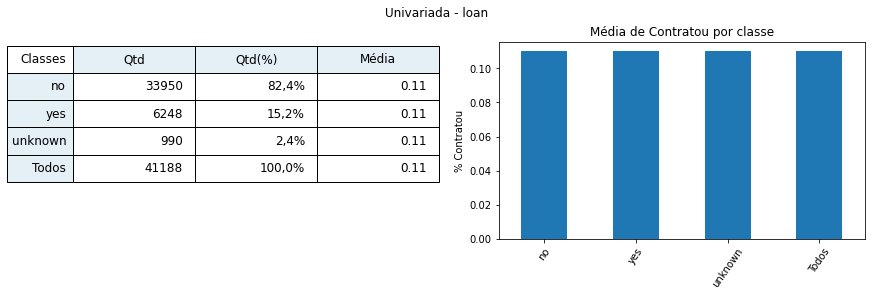

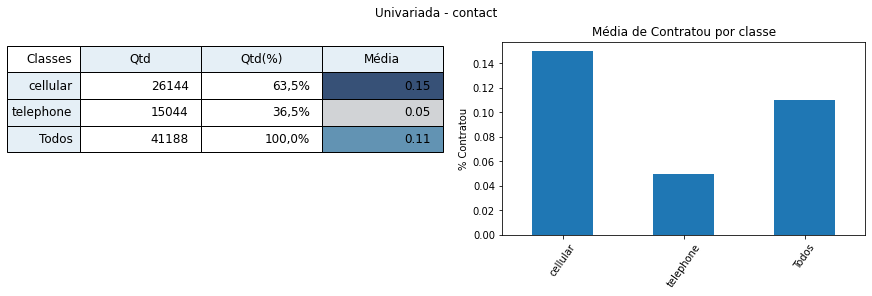

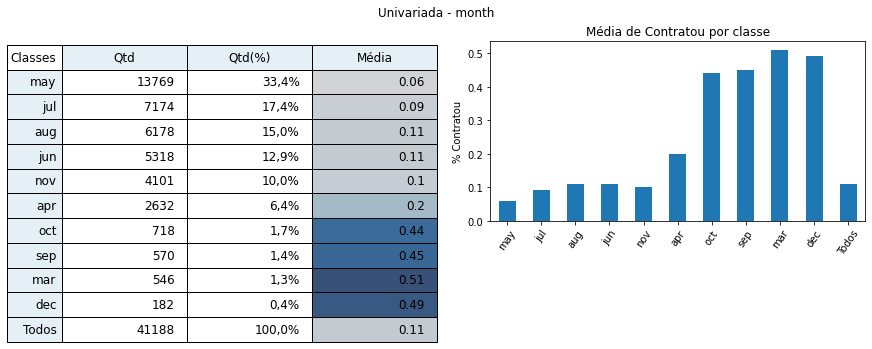

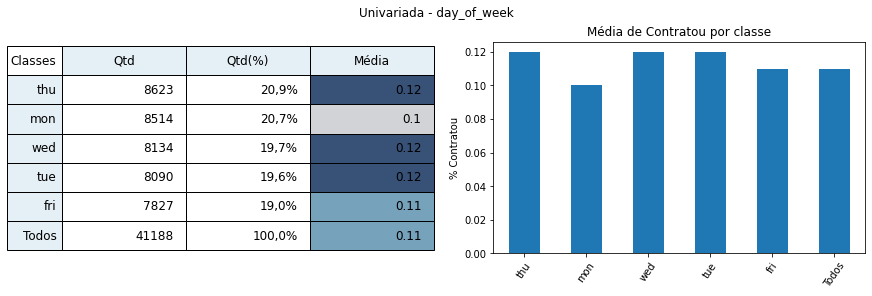

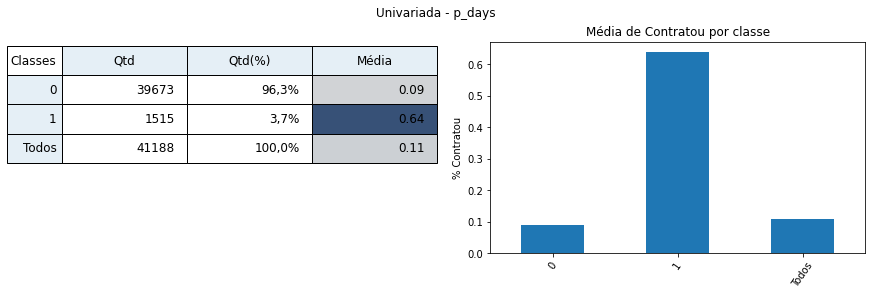

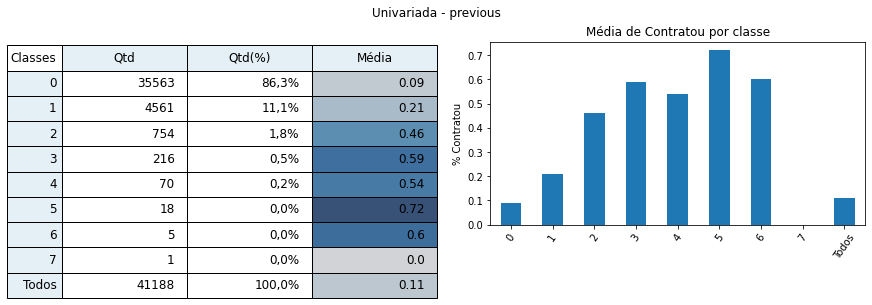

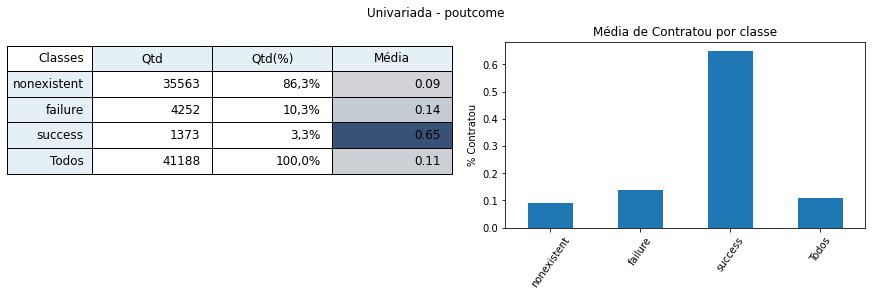

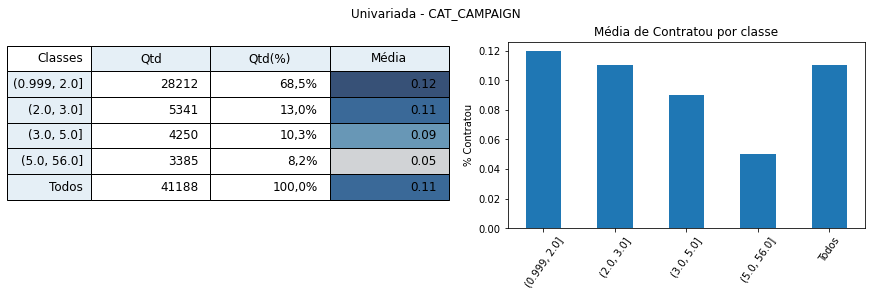

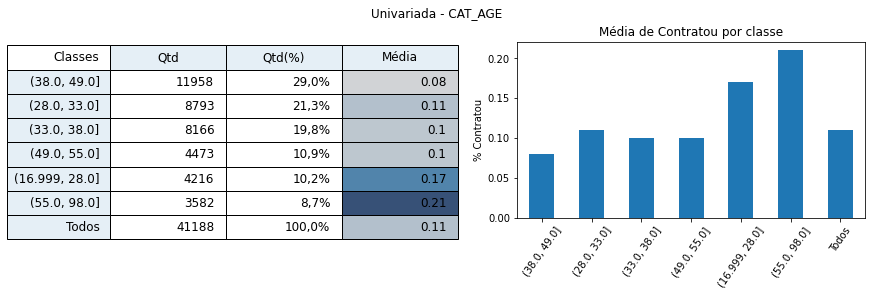

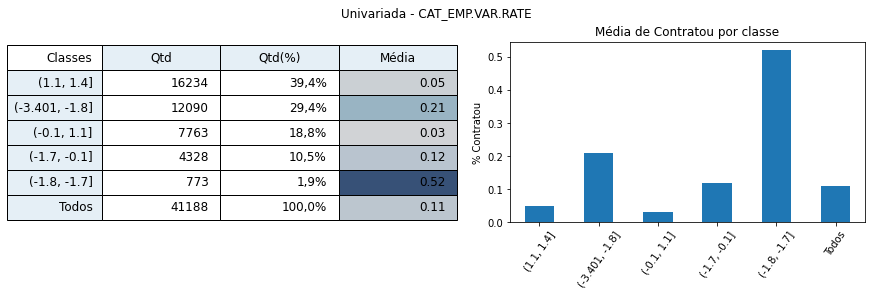

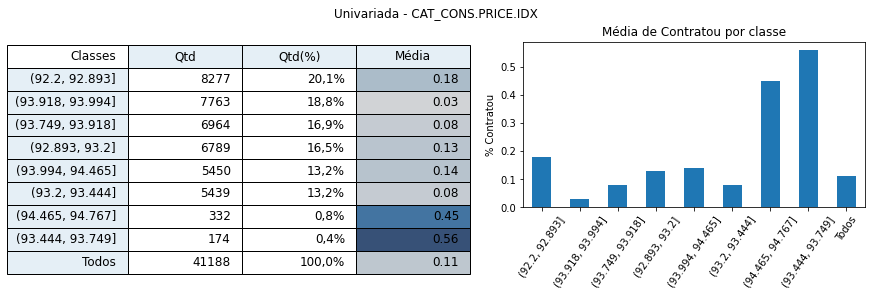

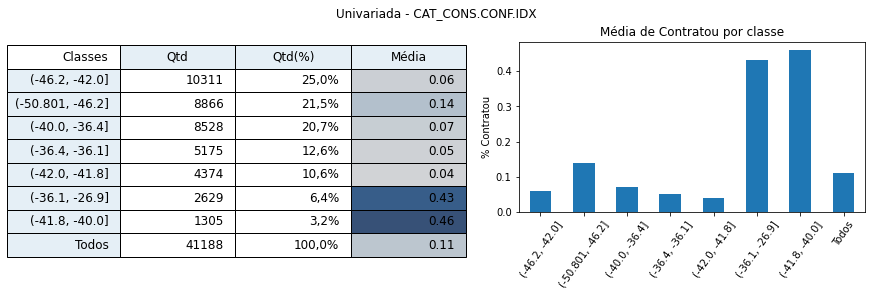

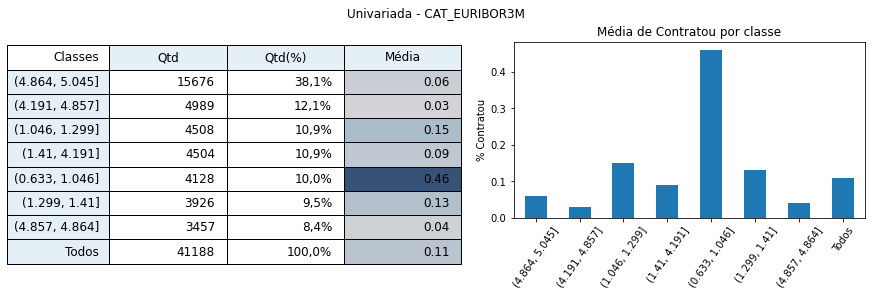

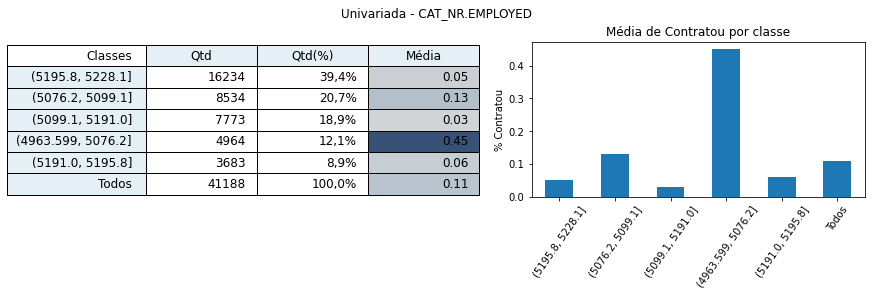

In [8]:
import univariate as uni

importlib.reload(uni)
resume = uni.AnaliseBase(data, 'Contratou')
resume.get_all_univariate(cat_cols  = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',  'p_days', 'previous',
       'poutcome'], 
       num_cols = ['campaign', 'age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

### 2. Combinações: 

- campaign + previous: Contatos totais já realizados
- poutcome + var_rate: Resultado da campanha anterior e índice de confiança 

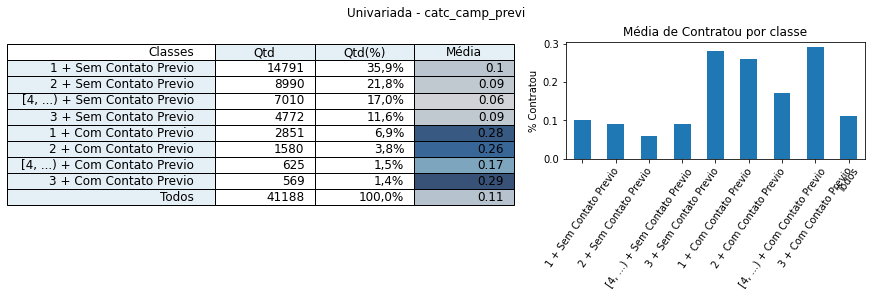

In [27]:
data['catc_camp_previ'] = data['campaign'].apply(lambda x: '[4, ...)' if x >=4 else str(x)) + ' + ' +\
  data['previous'].apply(lambda x: 'Com Contato Previo' if x >= 1 else 'Sem Contato Previo')
uni.AnaliseBase(data, 'Contratou').get_categorical_univariate_bin('catc_camp_previ')

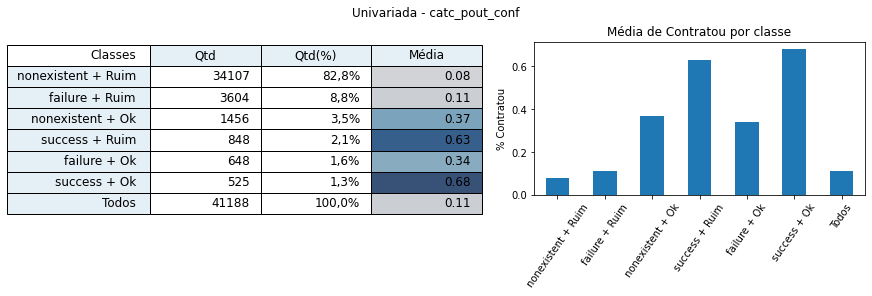

In [43]:
bins= [-11, 5, 15]
labels = ['Ruim', 'Ok']
data['cat_conf'] = data['cons.conf.idx'] - data['cons.conf.idx'].mean()
data['cat_conf'] = pd.cut(data['cat_conf'], bins=bins, labels=labels, right=False).astype(str)
data['catc_pout_conf'] = data['poutcome'] + ' + ' + data['cat_conf']
uni.AnaliseBase(data, 'Contratou').get_categorical_univariate_bin('catc_pout_conf')

#### Próximo Notebook: 
    pre_processamento.ipynb
